In [1]:
import re

In [5]:
file = "/home/aiops/chenxw/verl/results-execute-1.txt"
code_accs = []
case_accs = []
with open(file, "r") as f:
    lines = f.readlines()
    for line in lines:
        if "case acc:" in line:
            match = re.search(r"case acc:\s*([0-9.]+)", line)
            if match:
                case_acc = float(match.group(1))
                case_accs.append(case_acc)
print("Case Acc:", case_accs)

Case Acc: [0.296875, 0.0, 0.4, 0.3125, 0.3875, 0.125, 0.375, 0.23214285714285715, 0.34375, 0.0, 0.28125, 0.078125, 0.05357142857142857, 0.28125, 0.28125, 0.140625, 0.109375, 0.175, 0.10416666666666667, 0.044642857142857144, 0.2125, 0.0625, 0.16666666666666666, 0.0, 0.08928571428571429, 0.3541666666666667, 0.16071428571428573, 0.225, 0.078125, 0.15625, 0.0, 0.30357142857142855, 0.0375, 0.05, 0.1953125, 0.18055555555555555, 0.3625, 0.109375, 0.234375, 0.125, 0.16666666666666666, 0.22916666666666666, 0.25, 0.15, 0.46875, 0.2875, 0.5357142857142857, 0.09375, 0.6666666666666666, 0.6458333333333334, 0.6328125, 0.6944444444444444, 0.8819444444444444, 1.0, 0.0, 0.9553571428571429, 0.35714285714285715, 0.8515625, 0.9642857142857143, 0.359375, 0.9166666666666666, 0.7678571428571429, 0.8068181818181818, 0.9791666666666666, 0.9791666666666666, 0.9, 0.4861111111111111, 0.875, 0.90625, 0.8645833333333334, 0.9642857142857143, 0.8671875, 0.80625, 0.3392857142857143, 0.8828125, 0.7135416666666666, 0.95

In [7]:
import matplotlib.pyplot as plt

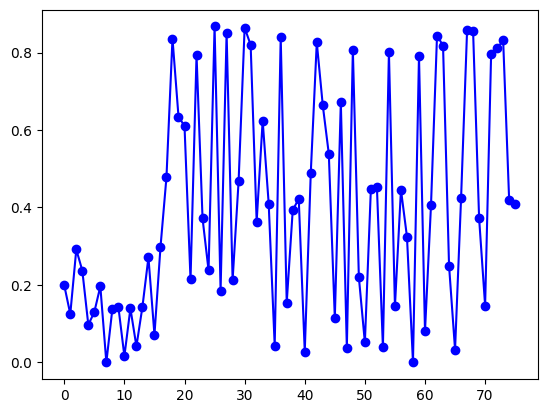

In [13]:
plt.plot(case_accs[160:], marker='o', linestyle='-', color='b')

In [9]:
file = "/home/aiops/chenxw/verl/results-execute-1.txt"
code_accs = []
with open(file, "r") as f:
    lines = f.readlines()
    for line in lines:
        if "code acc:" in line:
            match = re.search(r"code acc:\s*([0-9.]+)", line)
            if match:
                code_acc = float(match.group(1))
                code_accs.append(code_acc)
print("code Acc:", code_accs)

code Acc: [0.3984375, 0.1484375, 0.46484375, 0.28515625, 0.25, 0.09375, 0.35546875, 0.3359375, 0.31640625, 0.26171875, 0.3515625, 0.19140625, 0.328125, 0.20703125, 0.1953125, 0.26953125, 0.16015625, 0.21484375, 0.1015625, 0.3046875, 0.25, 0.43359375, 0.2265625, 0.3046875, 0.2578125, 0.390625, 0.3046875, 0.20703125, 0.28515625, 0.4140625, 0.11328125, 0.3671875, 0.25, 0.203125, 0.28515625, 0.44921875, 0.3125, 0.25, 0.1953125, 0.234375, 0.26953125, 0.2578125, 0.31640625, 0.234375, 0.33984375, 0.27734375, 0.328125, 0.24609375, 0.30078125, 0.171875, 0.29296875, 0.43359375, 0.359375, 0.0703125, 0.3203125, 0.3828125, 0.34375, 0.39453125, 0.27734375, 0.3984375, 0.3359375, 0.3046875, 0.5546875, 0.3203125, 0.31640625, 0.25390625, 0.421875, 0.40625, 0.3671875, 0.3203125, 0.3359375, 0.4609375, 0.453125, 0.28125, 0.40625, 0.5625, 0.35546875, 0.39453125, 0.38671875, 0.4375, 0.3125, 0.265625, 0.52734375, 0.2578125, 0.29296875, 0.515625, 0.37890625, 0.3125, 0.62890625, 0.23046875, 0.21875, 0.4453125, 

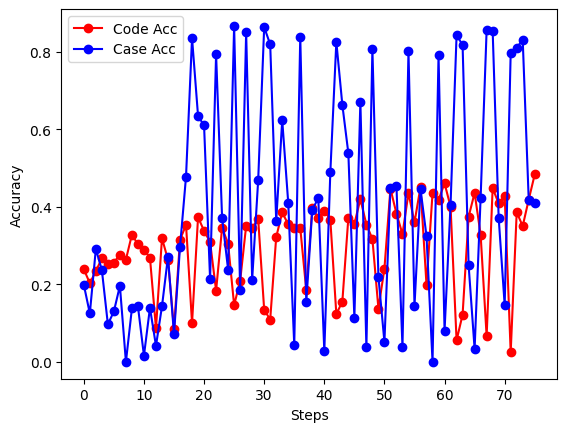

In [16]:
plt.plot(code_accs[160:], marker='o', linestyle='-', color='r', label='Code Acc')
plt.plot(case_accs[160:], marker='o', linestyle='-', color='b', label='Case Acc')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()